In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean
    
def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean
    
def getDataCSV(symbol):
    return pd.read_csv("data/{}.csv".format(str(symbol)), header =0, usecols=['Date','Close'],index_col=['Date'])

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()
    
def plotHistData(df,title="",x="",y="",b=20,mean=999,std=999):
    ax = df.hist(bins=b)
    ax.set_title = title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if (mean != 999) and (std != 999) :
        plt.axvline(mean,color="y",linestyle="dashed",linewidth=2)
        plt.axvline(std,color="r",linestyle="dashed",linewidth=2)
        plt.axvline(-std,color="r",linestyle="dashed",linewidth=2)
    plt.show()
    
def plotHistDataMulti(df,tickers,title="",x="",y="",b=20,mean=999,std=999):
    for symbol in tickers:
        df[str(symbol)].hist(bins=20, label=str(symbol))
    plt.legend(loc='upper right')
    plt.show()
    
def dailyReturns(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    dr.iloc[0] = 0
    #dr.iloc[0,:] = 0
    return dr

def dailyReturnsMulti(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    #dr.iloc[0] = 0
    dr.iloc[0,:] = 0
    return dr
    
def plotScatterMulti(df,x="",y="",polyDegree=1):
    global beta,alpha
    df.plot(kind='scatter',x=str(x),y=str(y))
    beta,alpha = np.polyfit(df[str(x)],df[str(y)],polyDegree) 
    plt.plot(df[str(x)], beta*df[str(x)] + alpha,'-', color='r')
    plt.show()
    
def predictor(X):
    Y = beta*X + alpha
    return Y


In [88]:
google = getDataYahoo("GOOG",'2016-01-01','2017-01-01',"Adj Close")

In [89]:
market = getDataYahoo("SPY",'2016-01-01','2017-01-01',"Adj Close")

In [102]:
oldDummy = getDataYahoo(["SPY","GOOG"],'2016-01-01','2017-01-01',"Adj Close")

In [90]:
g = google.as_matrix()
m = market.as_matrix()
print g
print "ABDBKASBDKABSJD"
print m

[ 741.840027  741.840027  742.580017  743.619995  726.390015  714.469971
  716.030029  726.070007  700.559998  714.719971  694.450012  694.450012
  701.789978  698.450012  706.590027  725.25      711.669983  713.039978
  699.98999   730.960022  742.950012  752.        764.650024  726.950012
  708.01001   683.570007  682.73999   678.109985  684.119995  683.109985
  682.400024  682.400024  691.        708.400024  697.349976  700.909973
  706.460022  695.849976  699.559998  705.75      705.070007  697.77002
  718.809998  718.849976  712.419983  710.890015  695.159973  693.969971
  705.23999   712.820007  726.820007  730.48999   728.330017  736.090027
  737.780029  737.599976  742.090027  740.75      738.059998  735.299988
  735.299988  733.530029  744.77002   750.530029  744.950012  749.909973
  745.289978  737.799988  745.690002  740.280029  739.150024  736.099976
  743.090027  751.719971  753.200012  759.        766.609985  753.929993
  752.669983  759.140015  718.77002   723.150024  70

In [91]:
regr = linear_model.LinearRegression()
regr.fit(m[:, np.newaxis], g[:, np.newaxis])
print regr.coef_, regr.intercept_

[[ 2.31789403]] [ 270.60938594]


In [92]:
newDummy = getDataYahoo(["SPY","GOOG"],'2017-01-02','2017-01-30',"Adj Close")
newSPY = getDataYahoo("SPY",'2017-01-02','2017-01-30',"Adj Close")
s = newSPY.as_matrix()

In [93]:
print newDummy

                  GOOG         SPY
2017-01-02  786.140015  222.073914
2017-01-03  786.140015  222.073914
2017-01-04  786.900024  223.395081
2017-01-05  794.020020  223.217606
2017-01-06  806.150024  224.016220
2017-01-09  806.650024  223.276779
2017-01-10  804.789978  223.276779
2017-01-11  807.909973  223.907761
2017-01-12  806.359985  223.345779
2017-01-13  807.880005  223.858475
2017-01-16  807.880005  223.858475
2017-01-17  804.609985  223.069702
2017-01-18  806.070007  223.562683
2017-01-19  802.174988  222.734497
2017-01-20  805.020020  223.552826
2017-01-23  819.309998  222.971115
2017-01-24  823.869995  224.400742
2017-01-25  835.669983  226.343048
2017-01-26  832.150024  226.106415
2017-01-27  823.309998  225.751480
2017-01-30  802.320007  224.351440


In [99]:
print regr.predict(s[:, np.newaxis])

[[ 785.35318576]
 [ 785.35318576]
 [ 788.41551086]
 [ 788.00414262]
 [ 789.85524524]
 [ 788.14129936]
 [ 788.14129936]
 [ 789.60384878]
 [ 788.30123405]
 [ 789.48960905]
 [ 789.48960905]
 [ 787.66131682]
 [ 788.80399454]
 [ 786.88434715]
 [ 788.78114706]
 [ 787.4328026 ]
 [ 790.74652649]
 [ 795.24858598]
 [ 794.70009576]
 [ 793.87739404]
 [ 790.63224968]]


In [97]:
plotData()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

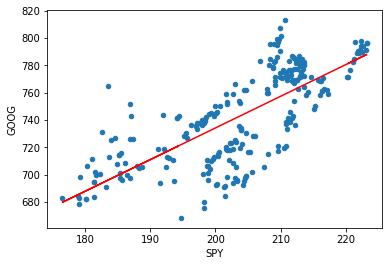

270.609385936
2.31789403155


In [104]:
plotScatterMulti(oldDummy,"SPY","GOOG",1)
print alpha
print beta

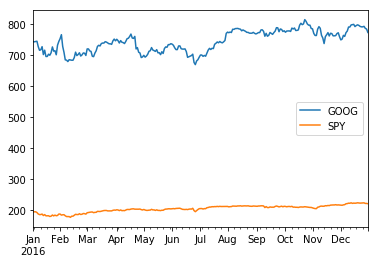

In [105]:
plotData(oldDummy)

/Users/apple/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys
/Users/apple/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


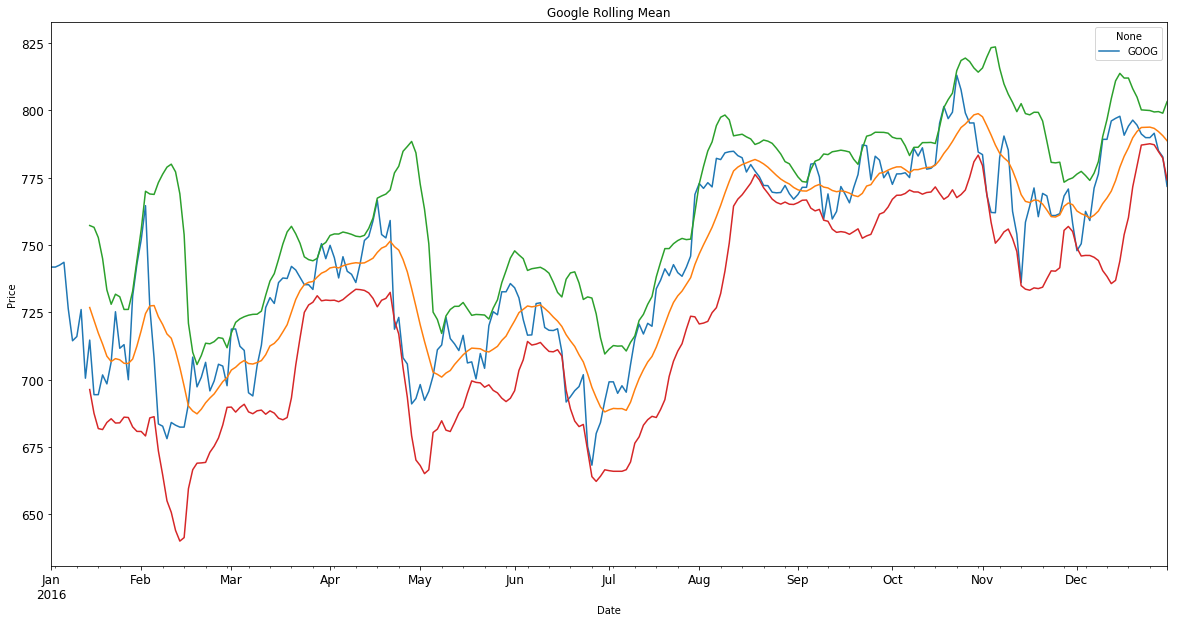

In [108]:
plt.figure(figsize=(20,10))
ax = oldDummy['GOOG'].plot(title="Google Rolling Mean", fontsize=12, label='GOOG')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')

rollingMeanGoogle = pd.rolling_mean(oldDummy['GOOG'], window=10)
rollingMeanGoogle.plot()

rollingStdGoogle = pd.rolling_std(oldDummy['GOOG'], window=10)

upperBand = rollingMeanGoogle + rollingStdGoogle*2
lowerBand = rollingMeanGoogle - rollingStdGoogle*2

upperBand.plot()
lowerBand.plot()

plt.show()

/Users/apple/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  import sys
/Users/apple/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


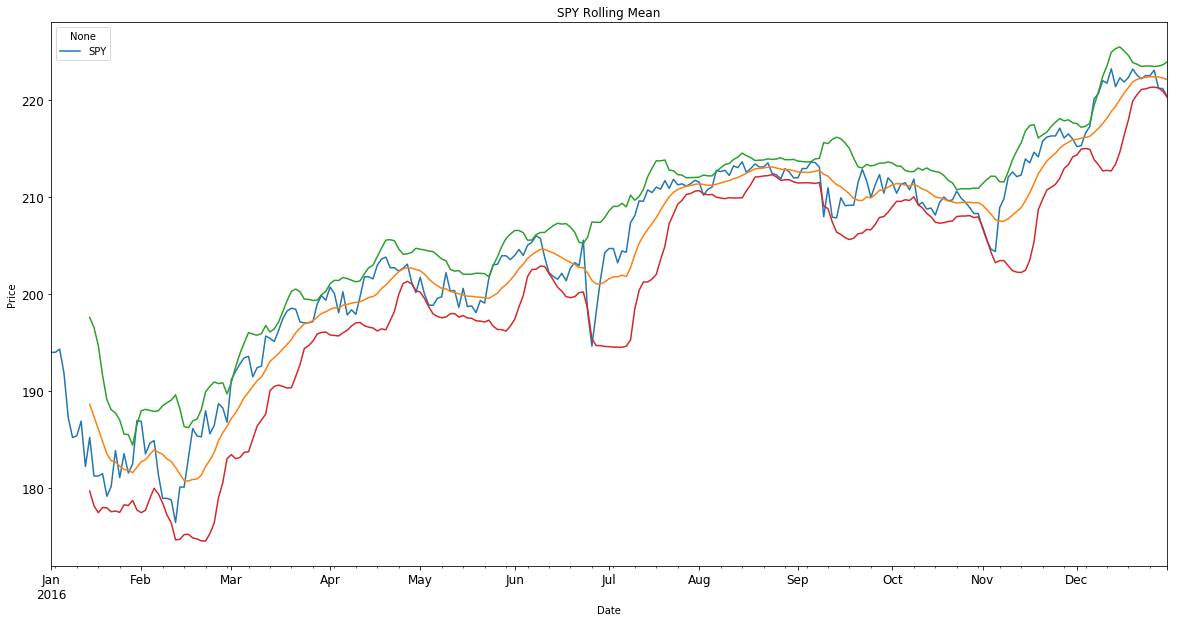

In [110]:
plt.figure(figsize=(20,10))
ax = oldDummy['SPY'].plot(title="SPY Rolling Mean", fontsize=12, label='SPY')
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')

rollingMeanGoogle = pd.rolling_mean(oldDummy['SPY'], window=10)
rollingMeanGoogle.plot()

rollingStdGoogle = pd.rolling_std(oldDummy['SPY'], window=10)

upperBand = rollingMeanGoogle + rollingStdGoogle*2
lowerBand = rollingMeanGoogle - rollingStdGoogle*2

upperBand.plot()
lowerBand.plot()

plt.show()